In [70]:
# Pull traffic data from Chicago City Data API
import pandas as pd
from sodapy import Socrata
from config import city_data_pw, app_token
import matplotlib.pyplot as plt
import numpy as np

# Import downloaded csv file
crashes_csv = "Traffic_Crashes.csv"
traffic_crashes = pd.read_csv(crashes_csv)
crashes_df = pd.DataFrame(traffic_crashes)
crashes_drop_df = crashes_df.dropna(subset=['LATITUDE', 'LONGITUDE'], how='all')
crashes_drop_df.head()

C:\Users\gripei01\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC319175,NaN,6/24/2019 1:30,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,1,2,6,41.950021,-87.648729,POINT (-87.648729461363 41.950021042777)
1,JC319110,NaN,6/24/2019 0:15,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,0,2,6,41.800297,-87.706349,POINT (-87.706348495564 41.800297179753)
2,JC319103,NaN,6/24/2019 0:09,25,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,...,0.0,0.0,2.0,0.0,0,2,6,41.878969,-87.726493,POINT (-87.726492697013 41.878968897127)
3,JC319098,NaN,6/24/2019 0:05,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0,2,6,41.953187,-87.757266,POINT (-87.757265734676 41.953186849643)
4,JC319100,NaN,6/23/2019 23:50,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,23,1,6,41.867551,-87.625209,POINT (-87.625209100215 41.867550959738)


In [71]:
crashes_drop_df.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

In [72]:
# Reduce to only columns we care about
crashes_drop_df = crashes_drop_df[['CRASH_DATE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                        'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'FIRST_CRASH_TYPE', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
                        'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION']]


# Reformat the date column to be easily comparable dates
crashes_drop_df['CRASH_DATE'] = pd.to_datetime(crashes_drop_df['CRASH_DATE'])
crashes_drop_df.sort_values(by='CRASH_DATE', ascending=False)

# Filter the data frame for only dates 2018 onward

crashes_2017_18 = crashes_drop_df.loc[(crashes_drop_df['CRASH_DATE'] >= "2017-01-01") & 
                                        (crashes_drop_df['CRASH_DATE'] <= "2018-12-31"), :]
crashes_2017_18.head()


,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,STREET_NO,STREET_DIRECTION,STREET_NAME,FIRST_CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
55419,2018-12-31 00:00:00,CLEAR,DARKNESS,6350,N,HOYNE AVE,REAR END,0.0,0.0,0,2,12,41.997549,-87.682706,POINT (-87.682705990061 41.997548692976)
55420,2018-12-30 23:40:00,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",1958,W,FULLERTON AVE,REAR END,0.0,0.0,23,1,12,41.925136,-87.677879,POINT (-87.677878977271 41.92513614134)
55421,2018-12-30 23:30:00,CLEAR,"DARKNESS, LIGHTED ROAD",3431,N,AUSTIN AVE,FIXED OBJECT,1.0,0.0,23,1,12,41.943075,-87.776250,POINT (-87.776249727669 41.943074658434)
55422,2018-12-30 23:20:00,CLEAR,"DARKNESS, LIGHTED ROAD",3735,N,MILWAUKEE AVE,REAR END,0.0,0.0,23,1,12,41.948788,-87.739519,POINT (-87.739518820234 41.948787810242)
55423,2018-12-30 23:15:00,CLEAR,DARKNESS,8900,S,STONY ISLAND AVE,SIDESWIPE SAME DIRECTION,0.0,0.0,23,1,12,41.733188,-87.585713,POINT (-87.585712697936 41.733187965898)


In [73]:
# split the crash_date column into date and time

crashes_2017_18['Crash Date'] = [d.date() for d in crashes_2017_18['CRASH_DATE']]
crashes_2017_18['Crash Time'] = [d.time() for d in crashes_2017_18['CRASH_DATE']]

# separate out by year, month, and day instead of date
# crashes_2017_18['Crash Year'] = [d.year() for d in crashes_2017_18['CRASH_DATE']]
# crashes_2017_18['Crash Month'] = [d.month() for d in crashes_2017_18['CRASH_DATE']]
# crashes_2017_18['Crash Day'] = [d.day() for d in crashes_2017_18['CRASH_DATE']]


# Reselect the columns I want
crashes_2017_18 = crashes_2017_18[['Crash Date', 'Crash Time', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                        'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'FIRST_CRASH_TYPE', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
                        'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION']]

crashes_2017_18.head()

C:\Users\gripei01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gripei01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Crash Date,Crash Time,WEATHER_CONDITION,LIGHTING_CONDITION,STREET_NO,STREET_DIRECTION,STREET_NAME,FIRST_CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
55419,2018-12-31,00:00:00,CLEAR,DARKNESS,6350,N,HOYNE AVE,REAR END,0.0,0.0,0,2,12,41.997549,-87.682706,POINT (-87.682705990061 41.997548692976)
55420,2018-12-30,23:40:00,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",1958,W,FULLERTON AVE,REAR END,0.0,0.0,23,1,12,41.925136,-87.677879,POINT (-87.677878977271 41.92513614134)
55421,2018-12-30,23:30:00,CLEAR,"DARKNESS, LIGHTED ROAD",3431,N,AUSTIN AVE,FIXED OBJECT,1.0,0.0,23,1,12,41.943075,-87.776250,POINT (-87.776249727669 41.943074658434)
55422,2018-12-30,23:20:00,CLEAR,"DARKNESS, LIGHTED ROAD",3735,N,MILWAUKEE AVE,REAR END,0.0,0.0,23,1,12,41.948788,-87.739519,POINT (-87.739518820234 41.948787810242)
55423,2018-12-30,23:15:00,CLEAR,DARKNESS,8900,S,STONY ISLAND AVE,SIDESWIPE SAME DIRECTION,0.0,0.0,23,1,12,41.733188,-87.585713,POINT (-87.585712697936 41.733187965898)


In [74]:
# Break into two different data frames -- one for 2017 and one for 2018
date_2017 = pd.to_datetime("2017-12-31").date()
date_2018 = pd.to_datetime("2018-01-01").date()

crashes_2017 = crashes_2017_18.loc[(crashes_2017_18['Crash Date'] <= date_2017), :]

crashes_2018 = crashes_2017_18.loc[(crashes_2017_18['Crash Date'] >= date_2018), :]


In [75]:
# Create Bins for the seasons
season_bins = [0,3,6,9,12]
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']

crashes_2017_18['Season'] = pd.cut(crashes_2017_18['CRASH_MONTH'], season_bins, labels=season_labels)

# Group Crashes by Season
crashes_groupby_season = crashes_2017_18.groupby(['Season'])
count_seasons = crashes_groupby_season['Crash Date'].count() 

# Group the crashes by month
crashes_groupby_month = crashes_2017_18.groupby(['CRASH_MONTH'])                                     
count_month = crashes_groupby_month['Crash Date'].count()      


# Group the crashes by weather condition
crashes_groupby_weather = crashes_2017_18.groupby(['WEATHER_CONDITION'])
count_weather = crashes_groupby_weather['Crash Time'].count()

# Group the crashes by Lighting Condition
crashes_groupby_lighting = crashes_2017_18.groupby(['LIGHTING_CONDITION'])
count_lighting = crashes_groupby_lighting['Crash Time'].count()  


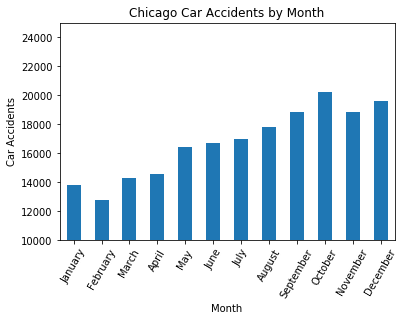

In [76]:
# Plot a bar graph of accidents by season

months = ["January","February","March", "April", "May", "June", "July", "August",
          "September", "October", "November", "December"]

crashes_by_month = count_month.plot(kind='bar', title="Chicago Car Accidents by Month", ylim=[10000, 25000])

crashes_by_month.set_xlabel("Month")
crashes_by_month.set_ylabel("Car Accidents")
plt.xticks(np.arange(12), months, rotation=60)

crashes_by_month

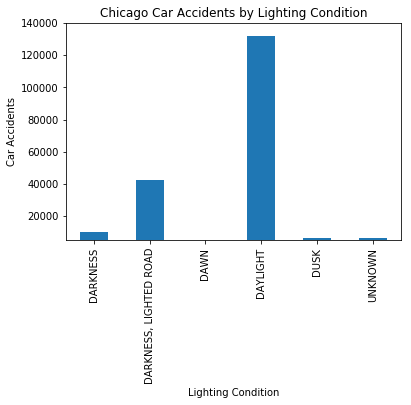

In [77]:
# Plot a bar graph of accidents by season

conditions = []

crashes_by_lighting = count_lighting.plot(kind='bar', title="Chicago Car Accidents by Lighting Condition", ylim=[5000, 140000])

crashes_by_lighting.set_xlabel("Lighting Condition")
crashes_by_lighting.set_ylabel("Car Accidents")
# plt.xticks(rotation=60)

crashes_by_lighting

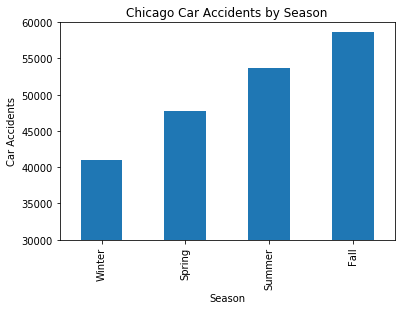

In [78]:
# Plot a bar graph of accidents by season

crashes_by_season = count_seasons.plot(kind='bar', title="Chicago Car Accidents by Season", ylim=[30000, 60000])

crashes_by_season.set_xlabel("Season")
crashes_by_season.set_ylabel("Car Accidents")
# plt.xticks(rotation=60)

crashes_by_season

In [97]:
# Make a data frame with the Chicago population from 2015 to 2019

pop_years = [2014, 2015, 2016, 2017, 2018]
chi_pops = [2728524, 2726215, 2718946, 2713067, 2705994]
chi_yearly_pops = {"Year": pop_years, "Chicago Population": chi_pops}

chicago_pop_df = pd.DataFrame(chi_yearly_pops)
chicago_pop_df

,Year,Chicago Population
0,2014,2728524
1,2015,2726215
2,2016,2718946
3,2017,2713067
4,2018,2705994


Text(0, 0.5, 'Population')

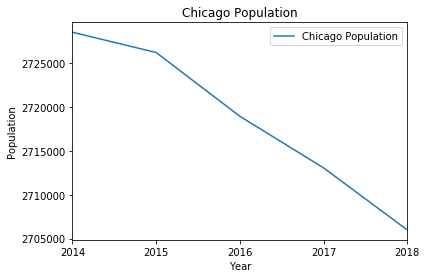

In [126]:
chicago_pop_df.plot(kind="line", x="Year", y='Chicago Population', title="Chicago Population")
plt.xticks(np.arange(2014, 2019, 1))
plt.ylabel("Population")


In [80]:
# put the crashes on a gmap
import gmaps

crash_locations = crashes_2017_18[['LATITUDE', 'LONGITUDE']]
# rating = crashes_groupby_date['Crash Time'].count()


fig_crashes = gmaps.figure()

heat_layer = gmaps.heatmap_layer(crash_locations, 
                                 dissipating=False, max_intensity=1,
                                 point_radius = .00005)

fig_crashes.add_layer(heat_layer)

fig_crashes


Figure(layout=FigureLayout(height='420px'))

In [127]:
#Filter original dataframe for only crashes that had a fatality and put on gmaps

fatal_crashes = crashes_2017_18.loc[(crashes_2017_18['INJURIES_FATAL'] > 0), :]

fatal_crash_locations = fatal_crashes[['LATITUDE', 'LONGITUDE']]

fig_fatal_crashes = gmaps.figure()

heat_layer = gmaps.heatmap_layer(fatal_crash_locations, 
                                 dissipating=False, max_intensity=1,
                                 point_radius = .005)

fig_fatal_crashes.add_layer(heat_layer)

fig_fatal_crashes

Figure(layout=FigureLayout(height='420px'))

In [83]:
fatal_crashes

,Crash Date,Crash Time,WEATHER_CONDITION,LIGHTING_CONDITION,STREET_NO,STREET_DIRECTION,STREET_NAME,FIRST_CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Season
56976,2018-12-25,19:05:00,CLEAR,"DARKNESS, LIGHTED ROAD",2150,W,111TH ST,PARKED MOTOR VEHICLE,3.0,1.0,19,3,12,41.691968,-87.675944,POINT (-87.675943964568 41.691967805961),Fall
57327,2018-12-24,00:43:00,CLEAR,"DARKNESS, LIGHTED ROAD",6603,S,STONY ISLAND AVE,FIXED OBJECT,1.0,1.0,0,2,12,41.775064,-87.586091,POINT (-87.586090851669 41.775064310676),Fall
57596,2018-12-22,23:54:00,CLEAR,"DARKNESS, LIGHTED ROAD",103,N,KEDZIE AVE,FIXED OBJECT,1.0,1.0,23,7,12,41.882916,-87.706026,POINT (-87.706026246214 41.882915574152),Fall
58962,2018-12-18,21:04:00,CLEAR,DARKNESS,10200,S,HALSTED ST,PARKED MOTOR VEHICLE,1.0,1.0,21,3,12,41.708644,-87.643024,POINT (-87.643024347783 41.708643985185),Fall
60294,2018-12-15,01:02:00,CLEAR,"DARKNESS, LIGHTED ROAD",1920,N,ASHLAND AVE,FIXED OBJECT,2.0,1.0,1,7,12,41.916764,-87.667920,POINT (-87.667919969134 41.916763973481),Fall
60778,2018-12-13,21:05:00,RAIN,"DARKNESS, LIGHTED ROAD",1500,W,WILSON AVE,PEDESTRIAN,1.0,1.0,21,5,12,41.965364,-87.667880,POINT (-87.667879517599 41.965364176671),Fall
60995,2018-12-13,12:25:00,CLEAR,DAYLIGHT,5265,W,NORTH AVE,REAR END,1.0,1.0,12,5,12,41.909363,-87.758055,POINT (-87.7580547856 41.909362512142),Fall
64073,2018-12-03,20:12:00,SNOW,"DARKNESS, LIGHTED ROAD",7757,S,BENNETT AVE,PARKED MOTOR VEHICLE,1.0,1.0,20,2,12,41.753543,-87.578325,POINT (-87.578325179828 41.753542859011),Fall
64641,2018-12-02,02:56:00,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",5825,S,ELIZABETH ST,FIXED OBJECT,1.0,1.0,2,1,12,41.787906,-87.655783,POINT (-87.655782782411 41.787905940396),Fall
68378,2018-11-19,22:43:00,CLEAR,"DARKNESS, LIGHTED ROAD",7455,S,CICERO AVE,PEDESTRIAN,1.0,1.0,22,2,11,41.757381,-87.741485,POINT (-87.741485291316 41.757380517133),Fall


In [91]:
# Import Rideshare CSV
rideshare_csv = "rs_filter_csv.csv"
rideshare_data = pd.read_csv(rideshare_csv)
rideshare_df = pd.DataFrame(rideshare_data)

rideshare_df = rideshare_df[['Month', 'NUMBER_OF_TRIPS_2015', 'NUMBER_OF_TRIPS_2016', 'NUMBER_OF_TRIPS_2017',
                            'NUMBER_OF_TRIPS_2018']]

rideshare_df

,Month,NUMBER_OF_TRIPS_2015,NUMBER_OF_TRIPS_2016,NUMBER_OF_TRIPS_2017,NUMBER_OF_TRIPS_2018
0,1,518539,1733583,3582540,4842911
1,2,518539,1732573,3455601,4718735
2,3,712521,1887034,4017804,5284216
3,4,764487,2014292,3839776,3500907
4,5,868650,2184055,4039394,3580748
5,6,876603,2256966,4007753,5292651
6,7,956447,2690828,4109970,5052784
7,8,1041740,2764145,4129588,5236080
8,9,1098735,2813310,4084594,4981605
9,10,1140334,3250032,4523491,5230188


In [92]:
rideshare_df.sum()

Month                         78
NUMBER_OF_TRIPS_2015    11052156
NUMBER_OF_TRIPS_2016    29898808
NUMBER_OF_TRIPS_2017    48857182
NUMBER_OF_TRIPS_2018    57779874
dtype: int64